# Non-Personalized Books Recommendation System

#### Load the required python packages

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display

#### Loading the required datasets

In [2]:
#load books dataset containing the details of the book
book = pd.read_csv('F:/RS/BX-Books/BX-Books.csv',sep = ';',error_bad_lines=False,encoding='latin-1')
#removing the unnecessary attributes
book.drop(["Year-Of-Publication","Image-URL-S","Image-URL-M","Image-URL-L"],axis=1,inplace=True)
display(Markdown("#### **Books Data:**"))
print(book.head())

#load book-rating dataset which holds the informatio about the ratings provided by various users
ratings = pd.read_csv('F:/RS/BX-Books/BX-Book-Ratings.csv',sep = ';',error_bad_lines=False,encoding='latin-1')
display(Markdown("#### **Ratings Data:**"))
print(ratings.head())

#load user data 
user = pd.read_csv('F:/RS/BX-Books/BX-Users.csv',sep = ';',error_bad_lines=False,encoding='latin-1')
display(Markdown("#### **User Data:**"))
print(user.head())

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\WavicleData\Anaconda3\lib\site-packages\IPython\core\interactives

#### **Books Data:**

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author                   Publisher  
0    Mark P. O. Morford     Oxford University Press  
1  Richard Bruce Wright       HarperFlamingo Canada  
2          Carlo D'Este             HarperPerennial  
3      Gina Bari Kolata        Farrar Straus Giroux  
4       E. J. W. Barber  W. W. Norton &amp; Company  


#### **Ratings Data:**

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


#### **User Data:**

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


#### Data Preparation

In [3]:
book_rating = pd.merge(book,ratings,on="ISBN")
book_rating.head()

,ISBN,Book-Title,Book-Author,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,41385,0


In [4]:
book_rating.rename(columns={"ISBN":"isbn", "Book-Title":"booktitle", "Book-Rating":"bookrating", "Book-Author":"bookauthor", "Publisher":"publisher", "User-ID":"userid"},inplace=True)
book_rating.head()

,isbn,booktitle,bookauthor,publisher,userid,bookrating
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,41385,0


### Data Filteration

Take books rated more than 7 out of 10

In [5]:
book_rating['highly_rated'] = book_rating.eval('bookrating > 7').astype(int)

In [6]:
ratings_count = pd.DataFrame(book_rating.groupby("isbn")["highly_rated"].count())
ratings_count = ratings_count.sort_values("highly_rated",ascending=False)
ratings_count.head(10)

,highly_rated
isbn,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
044023722X,647
0142001740,615
067976402X,614
0671027360,586


In [7]:
pd.DataFrame({'isbn':ratings_count.index[:10],'Count':ratings_count.highly_rated[:10]})

,isbn,Count
isbn,,
0971880107,0971880107,2502
0316666343,0316666343,1295
0385504209,0385504209,883
0060928336,0060928336,732
0312195516,0312195516,723
044023722X,044023722X,647
0142001740,0142001740,615
067976402X,067976402X,614
0671027360,0671027360,586


#### Recommendation System

In [8]:
pd.DataFrame({'isbn':ratings_count.index[:10],'Count':ratings_count.highly_rated[:10]}).reset_index(drop=True)

,isbn,Count
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723
5,044023722X,647
6,0142001740,615
7,067976402X,614
8,0671027360,586
9,0446672211,585


In [9]:
popular_books = pd.DataFrame({'ISBN':ratings_count.index[:10],'Count':ratings_count.highly_rated[:10]}).reset_index(drop=True)
popular_books = pd.merge(popular_books,book, on="ISBN")
recommended_based_on_popular_books = popular_books.dropna()

In [10]:
recommended_based_on_popular_books

,ISBN,Count,Book-Title,Book-Author,Publisher
0,0971880107,2502,Wild Animus,Rich Shapero,Too Far
1,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold,"Little, Brown"
2,0385504209,883,The Da Vinci Code,Dan Brown,Doubleday
3,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,Perennial
4,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA
5,044023722X,647,A Painted House,John Grisham,Dell Publishing Company
6,0142001740,615,The Secret Life of Bees,Sue Monk Kidd,Penguin Books
7,067976402X,614,Snow Falling on Cedars,David Guterson,Vintage Books USA
8,0671027360,586,Angels &amp; Demons,Dan Brown,Pocket Star
9,0446672211,585,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,Warner Books


### Visualizing the recommended books

In [11]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

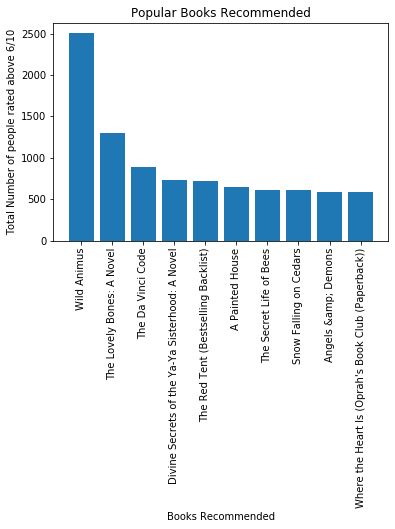

In [12]:
plt.bar(x=recommended_based_on_popular_books['Book-Title'],height='Count',data=recommended_based_on_popular_books)
plt.title('Popular Books Recommended')
plt.xlabel('Books Recommended')
plt.ylabel('Total Number of people rated above 6/10')
plt.xticks(rotation=90)